# Análise de resultados da pesquisa de Conhecimento das práticas de requisitos de software - Gov.BR

Este notebook faz a análise das respostas da pesquisa de Conhecimentos de Engenharia de Requisitos do programa Startup GOV.BR. Para isso, as seguintes ações serão realizadas:

- Recuperação das perguntas formuladas, para mapeamento das questões conforme o id do IMI
- Identificação de quais perguntas são reversas (Tp = R)
- Mapeamento das respostas para cada pergunta
- Separação das respostas dos questionários em três partes:
  - Questionário de Ambiente (QA): contém as perguntas abertas, que permitem identificar o ambiente que o especialista está alocado;
  - Questionário de Conhecimento (QC): Faz as perguntas que mensuram o nível de conhecimento do profissional em temas correlatos com a Engenharia de Requisitos
  - Questionário de Percepção (QP): Perguntas oriundas do IMI, que tem o objetivo de identificar os níveis de Interesse, Esfoço, Valor e Escolha Percebida
- Para as perguntas do Questionário de Percepção, cálculo do valor da resposta das perguntas reversas seguindo a fórmula: (Valor máximo Escala de Likert + 1 ) - Valor da resposta
- Cálculo da confiabilidade com o Alpha de Cronbach dos questionários QC e QP
- Cálculo da Média e Desvio Padrão
- Análise de correlações
- Rankeamento das respostas

## Importação das bibliotecas

Utilizaremos as seguintes bibliotecas:
- pandas: Permite criar DataFrames a partir dos arquivos Excel
- numpy: Biblioteca estatítica do Python
- pingouin: Lib que permite o cálculo do Alpha de Cronbach
- matplotlib e seaborn: Bibliotecas que permitem plotar gráficos

In [1]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns


c:\Users\demet\anaconda3\envs\engreq\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Recuperação das perguntas

Abriremos o arquivo `perguntas-questionario.xlsx` para criar os DataFrames:

In [2]:
perguntasQuestionario = pd.read_excel('arquivos/perguntas-questionario.xlsx', sheet_name='Estrutura Perguntas')
display(perguntasQuestionario)

,id,tipo,escala,tp,fase,pergunta
0,1,QA,NaN,NaN,NaN,Qual o seu papel na equipe de desenvolvimento?
1,2,QA,NaN,NaN,NaN,Em qual projeto você está alocado atualmente?
2,3,QA,NaN,NaN,NaN,Em qual fase está o seu projeto?
3,4,QA,NaN,NaN,NaN,Qual o modelo de desenvolvimento do seu projeto?
4,5,QA,NaN,NaN,NaN,Qual o modelo de desenvolvimento empregado nes...
5,6,QA,NaN,NaN,NaN,Como você gerenciar os requisitos do seu projeto?
6,7,QA,NaN,NaN,NaN,Como você elicita os requisitos do seu projeto?
7,8,QA,NaN,NaN,NaN,Há alguma metodologia de Requisitos que você c...
8,9,QA,NaN,NaN,NaN,Qual o motivo de não aplicar? (Opcional)
9,10,QC,NaN,NaN,Diagnóstico,Qual seu nível de conhecimento acerca dos tema...


Recuperaremos apenas as colunas de interesse: ID, Sc, Tp, Perguntas adaptadas com ajustes para envio

In [31]:
dfPerguntas = pd.DataFrame().assign(id=perguntasQuestionario['Id'], sc=perguntasQuestionario['Sc'], tp=perguntasQuestionario['Tp'],perguntaAdaptada=perguntasQuestionario['Perguntas adaptadas com ajustes para envio'], perguntaOriginal=perguntasQuestionario['Pergunta (Português)'])
print(dfPerguntas)

    id sc   tp                                   perguntaAdaptada  \
0    1  I  NaN  Foi prazeroso ajudar o TST com a pesquisa de f...   
1    2  I  NaN                                                NaN   
2    3  I    R  Achei monótono responder a pesquisa de feedbac...   
3    4  I    R                                                NaN   
4    5  I  NaN  Eu achei que responder à pesquisa de feedback ...   
5    8  P  NaN  Sou razoavelmente competente para sugerir melh...   
6    9  P  NaN                                                NaN   
7   11  P  NaN                                                NaN   
8   13  P    R  Sugerir melhorias com pesquisas de feedback pa...   
9   14  E  NaN  Fiz um esforço considerável em responder a pes...   
10  15  E    R                                                NaN   
11  16  E  NaN                                                NaN   
12  17  E  NaN                                                NaN   
13  19  T    R                    

Agora, filtraremos o dataset para trazer apenas os registros que possuem perguntas adaptadas:

In [32]:
dfPerguntasFiltradas = dfPerguntas.query('perguntaAdaptada.notnull()')
print(dfPerguntasFiltradas)

    id sc   tp                                   perguntaAdaptada  \
0    1  I  NaN  Foi prazeroso ajudar o TST com a pesquisa de f...   
2    3  I    R  Achei monótono responder a pesquisa de feedbac...   
4    5  I  NaN  Eu achei que responder à pesquisa de feedback ...   
5    8  P  NaN  Sou razoavelmente competente para sugerir melh...   
8   13  P    R  Sugerir melhorias com pesquisas de feedback pa...   
9   14  E  NaN  Fiz um esforço considerável em responder a pes...   
15  21  T    R  Fiquei bem à vontade enquanto respondia a pesq...   
17  23  T  NaN  Eu me senti pressionado(a) enquanto respondia ...   
23  29  C  NaN  Respondi a pesquisa de feedback para o TST por...   
24  30  C    R  Respondi a pesquisa de feedback para o TST por...   
25  32  V  NaN  Acho que responder a pesquisa de feedback é út...   
27  35  V  NaN  Creio que responder a pesquisa de feedback par...   
31  40  R  NaN  Senti que posso confiar nas pesquisa de feedba...   
32  41  R  NaN  Gostaria de intera

## Recuperação das respostas

Faremos agora o carregamento das respostas enviadas do formulário:

In [33]:
dfRespostas = pd.read_excel('arquivos/respostas-questionario.xlsx')
print(dfRespostas)

      Carimbo de data/hora  \
0  2022-12-08 11:09:37.891   
1  2022-12-08 11:17:20.247   
2  2022-12-08 11:24:41.264   
3  2022-12-08 11:38:58.288   
4  2022-12-08 11:49:07.551   
5  2022-12-08 13:20:46.608   
6  2022-12-08 14:11:07.361   
7  2022-12-08 15:08:20.335   
8  2022-12-08 15:12:21.118   
9  2022-12-08 19:23:04.912   
10 2022-12-09 08:45:03.231   
11 2022-12-09 10:33:57.132   
12 2022-12-09 11:18:33.257   
13 2022-12-11 06:38:50.143   
14 2022-12-12 06:20:09.375   
15 2022-12-14 22:23:57.000   
16 2022-12-15 09:10:13.000   
17 2022-12-16 10:45:03.000   
18 2022-12-16 11:38:04.000   
19 2022-12-19 12:49:45.000   

    Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.  \
0                                                   4                                               
1                                                   5                                               
2                                                   3             

In [34]:
dfRespostas = dfRespostas.drop(columns=['Carimbo de data/hora'])
print(dfRespostas)

    Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.  \
0                                                   4                                               
1                                                   5                                               
2                                                   3                                               
3                                                   5                                               
4                                                   3                                               
5                                                   5                                               
6                                                   5                                               
7                                                   3                                               
8                                                   4                                      

Definição de funções que ajudarão a ajustar o DataFrame:

In [35]:
def getIdFromColumnName(valor:str, nomeDaColuna: str, df: pd.DataFrame)->int :
    row = df.loc[df[nomeDaColuna]== valor]
    return row.iloc[0]['id']

print(getIdFromColumnName('Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.', 'perguntaAdaptada', dfPerguntasFiltradas))


5


In [36]:
def getTpById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['tp']

def getPerguntaById(valor:str,  df: pd.DataFrame)->int :
    return df.loc[df['id']== int(valor)].iloc[0]['perguntaAdaptada']


print(getTpById('3',  dfPerguntasFiltradas))

R


Vamos modificar o nome das colunas para que correspondam ao ID do questionário IMI:

In [37]:
dfRespostasComId = dfRespostas.copy()
columnsDictionary = {}
for coluna in dfRespostas.columns:
    idColuna = str(getIdFromColumnName(coluna, 'perguntaAdaptada', dfPerguntasFiltradas))
    columnsDictionary[coluna] = idColuna

print(columnsDictionary)
dfRespostasComId.rename(columns = columnsDictionary, inplace=True)
print(dfRespostasComId)

{'Eu achei que responder à pesquisa de feedback de sessão de julgamento foi muito interessante.': '5', 'Acho que responder a pesquisa de feedback é útil para melhorar a atividade jurisdicional do TST.': '32', 'Senti que posso confiar nas pesquisa de feedback sobre sessões de julgamento do TST.': '40', 'Eu me senti pressionado(a) enquanto respondia a pesquisa de feedback para o TST.': '23', 'Foi prazeroso ajudar o TST com a pesquisa de feedback da sessão.': '1', 'Fiz um esforço considerável em responder a pesquisa de feedback para avaliar as sessões de julgamento do TST.': '14', 'Creio que responder a pesquisa de feedback para o TST pode me ajudar a ter uma melhor participação em sessões de julgamento.': '35', 'Respondi a pesquisa de feedback para o TST porque eu tinha que fazer isso.': '30', 'Achei monótono responder a pesquisa de feedback para o TST.': '3', 'Gostaria de interagir mais frequentemente com o TST.': '41', 'Sugerir melhorias com pesquisas de feedback para o TST não é algo 

## Ajuste das perguntas reversas

Agora faremos os ajustes para as respostas que tem o Tp = 'R', o que indica que o valor deverá ser modificado para refletir a resposta ajustada. O primeiro passo será criar uma coluna com o valor da escala de Linkert utilizada (no nosso caso, 5) acrescido de 1, para que possamos subtrair essa coluna do nosso DataFrame:

In [38]:
# Criando uma coluna com valores 6 para permitir a subtração da coluna inteira
numeroRegistros =  dfRespostas.shape[0]
s = pd.Series(6)
listaComNumerosAjuste = s.repeat(numeroRegistros)
listaComNumerosAjuste = listaComNumerosAjuste.reset_index(drop=True)
print(listaComNumerosAjuste)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
dtype: int64


Após isso, inspecionaremos as colunas para identificar aquelas que devem ser revertidas, ou seja, que contenham o Tp = R na planilha de perguntas do IMI

In [56]:

dfRespostasAjustadas = dfRespostasComId.copy()
for col in dfRespostasAjustadas.columns:
    if (col.isdigit() and getTpById(col, dfPerguntasFiltradas) == 'R'):
        print('Coluna '+ col+ ' tem o Tp = R')
        dfRespostasAjustadas[col] = listaComNumerosAjuste - dfRespostasAjustadas[col]
print('Respostas originais')
display(dfRespostasComId)
print('Respostas ajustadas')
display(dfRespostasAjustadas)

Coluna 30 tem o Tp = R
Coluna 3 tem o Tp = R
Coluna 13 tem o Tp = R
Coluna 43 tem o Tp = R
Coluna 21 tem o Tp = R
Respostas originais


,5,32,40,23,1,14,35,30,3,41,13,8,43,21,29
0,4,4,4,2,3,4,4,4,3,2,3,4,4,4,4
1,5,5,5,1,5,3,5,1,1,5,1,5,1,5,5
2,3,4,4,1,4,3,4,1,1,3,3,1,3,3,3
3,5,5,5,1,3,1,1,1,1,1,3,3,1,5,5
4,3,5,3,5,5,2,3,2,1,5,1,4,3,5,5
5,5,5,5,1,5,2,4,4,2,5,3,3,2,5,5
6,5,5,5,1,5,1,5,1,1,5,1,3,1,5,5
7,3,1,1,4,3,2,1,4,3,4,1,4,5,2,4
8,4,5,4,1,4,1,3,1,3,4,1,5,4,4,5
9,5,5,5,1,5,4,2,1,1,5,1,5,1,5,5


Respostas ajustadas


,5,32,40,23,1,14,35,30,3,41,13,8,43,21,29
0,4,4,4,2,3,4,4,2,3,2,3,4,2,2,4
1,5,5,5,1,5,3,5,5,5,5,5,5,5,1,5
2,3,4,4,1,4,3,4,5,5,3,3,1,3,3,3
3,5,5,5,1,3,1,1,5,5,1,3,3,5,1,5
4,3,5,3,5,5,2,3,4,5,5,5,4,3,1,5
5,5,5,5,1,5,2,4,2,4,5,3,3,4,1,5
6,5,5,5,1,5,1,5,5,5,5,5,3,5,1,5
7,3,1,1,4,3,2,1,2,3,4,5,4,1,4,4
8,4,5,4,1,4,1,3,5,3,4,5,5,2,2,5
9,5,5,5,1,5,4,2,5,5,5,5,5,5,1,5


## Cálculo do Alpha de Cronbach

Com esses valores, podemos fazer agora o cálculo do Alpha de Cronbach:

In [40]:
pg.cronbach_alpha(data=dfRespostasAjustadas)

(0.7006715267852153, array([0.467, 0.862]))

O valor de 0.63 indica que as respostas não estão confiáveis. Vamos retirar alguma pergunta da nossa análise. Para tal, definiremos a função abaixo:

In [41]:
def dropColumnById(column:str, df:pd.DataFrame)->pd.DataFrame:
    return df.drop(columns=[column])


A pergunta que será retirada será a com id 21, pois é uma pergunta reversa diferente: é uma pergunta com viés positivo no bloco de Pressão/Tensão.

In [42]:
dfRespostasAjustadasSemPergunta21 = dropColumnById('21', dfRespostasAjustadas)
print(dfRespostasAjustadasSemPergunta21)

    5  32  40  23  1  14  35  30  3  41  13  8  43  29
0   4   4   4   2  3   4   4   2  3   2   3  4   2   4
1   5   5   5   1  5   3   5   5  5   5   5  5   5   5
2   3   4   4   1  4   3   4   5  5   3   3  1   3   3
3   5   5   5   1  3   1   1   5  5   1   3  3   5   5
4   3   5   3   5  5   2   3   4  5   5   5  4   3   5
5   5   5   5   1  5   2   4   2  4   5   3  3   4   5
6   5   5   5   1  5   1   5   5  5   5   5  3   5   5
7   3   1   1   4  3   2   1   2  3   4   5  4   1   4
8   4   5   4   1  4   1   3   5  3   4   5  5   2   5
9   5   5   5   1  5   4   2   5  5   5   5  5   5   5
10  5   4   5   1  5   1   5   5  5   4   3  3   5   5
11  5   5   5   1  5   1   5   5  5   5   1  5   5   5
12  5   5   5   1  5   2   5   5  5   5   5  5   5   5
13  4   4   4   1  4   1   4   5  5   4   5  4   5   5
14  4   5   5   1  5   1   5   5  5   5   4  3   5   5
15  5   5   5   1  4   4   5   5  5   5   5  4   5   5
16  4   4   4   1  4   2   3   4  4   4   2  3   3   3
17  3   4 

In [43]:
pg.cronbach_alpha(data=dfRespostasAjustadasSemPergunta21)

(0.7860709147837861, array([0.618, 0.901]))

Como o Alpha deu maior de 0.7, podemos seguir com a nossa análise.

# Análise estatística

Com o resultado ajustado, podemos verificar algumas estatísticas do DataFrame:

In [44]:
dfRespostasAjustadasSemPergunta21.describe()

,5,32,40,23,1,14,35,30,3,41,13,8,43,29
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,4.350000,4.500000,4.35000,1.500000,4.400000,1.950000,3.850000,4.400000,4.50000,4.250000,4.050000,3.800000,4.050000,4.65000
std,0.812728,0.945905,1.03999,1.147079,0.753937,1.099043,1.348488,1.095445,0.82717,1.118034,1.234376,1.056309,1.316894,0.67082
min,3.000000,1.000000,1.00000,1.000000,3.000000,1.000000,1.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,3.00000
25%,4.000000,4.000000,4.00000,1.000000,4.000000,1.000000,3.000000,4.000000,4.00000,4.000000,3.000000,3.000000,3.000000,4.75000
50%,5.000000,5.000000,5.00000,1.000000,5.000000,2.000000,4.000000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,5.00000
75%,5.000000,5.000000,5.00000,1.000000,5.000000,2.250000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000
max,5.000000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000


## Correlação

Para analisar a correlação entre as respostas, utilizaremos os resultados originais e não os ajustados. Isso se justifica pelo fato da correlação sair com o sinal trocado quando perguntas reversas são utilizadas com respostas ajustadas. Utilizando as respostas originais, o sinal da correlação ficará coerente. 

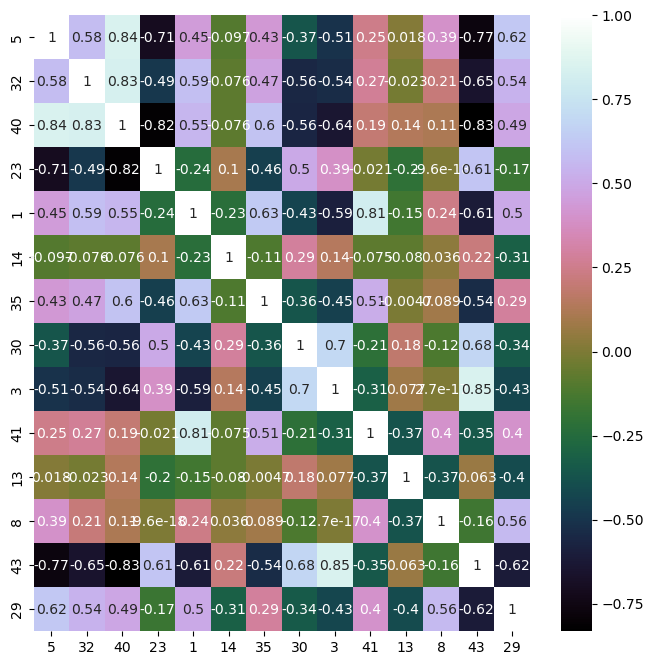

In [45]:
# for col in dfRespostasAjustadas.columns:
# col = '5'
# ax = sns.histplot(data=dfRespostasAjustadas[col])
dfRespostasOriginaisSemPergunta21 = dropColumnById('21', dfRespostasComId)
correlacoes = dfRespostasOriginaisSemPergunta21.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlacoes, annot=True, cmap='cubehelix');

Para averiguar as maiores correlações, podemos analisar o triângulo superior da matriz quadrada, removendo os valores que estão abaixo da diagonal de correlação total (correlação = 1):


In [46]:
correlacoesAbsolutas = correlacoes.abs()
upper_tri = correlacoesAbsolutas.where(np.triu(np.ones(correlacoesAbsolutas.shape),k=1).astype(bool))
print(upper_tri)



     5        32        40        23         1        14        35        30  \
5  NaN  0.581932  0.843746  0.705697  0.446652  0.097223  0.434613  0.366524   
32 NaN       NaN  0.829280  0.485071  0.590410  0.075941  0.474514  0.558728   
40 NaN       NaN       NaN  0.816199  0.550422  0.075978  0.602345  0.563620   
23 NaN       NaN       NaN       NaN  0.243432  0.104371  0.459346  0.502625   
1  NaN       NaN       NaN       NaN       NaN  0.228665  0.631574  0.433341   
14 NaN       NaN       NaN       NaN       NaN       NaN  0.111865  0.288526   
35 NaN       NaN       NaN       NaN       NaN       NaN       NaN  0.363420   
30 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3  NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
41 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
13 NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN       NaN       NaN       NaN    

Com os dados do triângulo superior, vamos verificar quais perguntas tem uma correlação forte ou muito forte (valor acima de 0.7)

In [47]:
s = upper_tri.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
correlacoesFortes = so.loc[lambda x : x >= 0.7]
print(correlacoesFortes)


43  3     0.845549
40  5     0.843746
43  40    0.832002
40  32    0.829280
23  40    0.816199
41  1     0.811708
43  5     0.769599
23  5     0.705697
dtype: float64


Vamos descrever as correlações junto com as perguntas, para verificar se há algum insight:

In [48]:
def getPercentualCorrelacao(linha:str, coluna:str, df: pd.DataFrame)->float:
    return df.loc[linha][coluna]

In [55]:
perguntasCorrelacionadas = []
for perguntas in correlacoesFortes.keys():
    linha = perguntas[0]
    coluna = perguntas[1]
    perguntaLinha = getPerguntaById(linha, dfPerguntasFiltradas)
    perguntaColuna = getPerguntaById(coluna, dfPerguntasFiltradas)
    percentualCorrelacao = getPercentualCorrelacao(linha, coluna, correlacoes)
    perguntasCorrelacionadas.append([linha,perguntaLinha,coluna, perguntaColuna,percentualCorrelacao])
    
dfPerguntasCorrelacionadas = pd.DataFrame(perguntasCorrelacionadas, columns=['ID 1','Pergunta 1','ID 2','Pergunta 2', 'Correlação']).sort_values(by=['ID 1'])
dfPerguntasCorrelacionadas.to_excel('correlacao-respostas.xlsx')
display(dfPerguntasCorrelacionadas)

,ID 1,Pergunta 1,ID 2,Pergunta 2,Correlação
4,23,Eu me senti pressionado(a) enquanto respondia ...,40,Senti que posso confiar nas pesquisa de feedba...,-0.816199
7,23,Eu me senti pressionado(a) enquanto respondia ...,5,Eu achei que responder à pesquisa de feedback ...,-0.705697
1,40,Senti que posso confiar nas pesquisa de feedba...,5,Eu achei que responder à pesquisa de feedback ...,0.843746
3,40,Senti que posso confiar nas pesquisa de feedba...,32,Acho que responder a pesquisa de feedback é út...,0.829280
5,41,Gostaria de interagir mais frequentemente com ...,1,Foi prazeroso ajudar o TST com a pesquisa de f...,0.811708
0,43,Não sinto que posso confiar nesta pesquisa de ...,3,Achei monótono responder a pesquisa de feedbac...,0.845549
2,43,Não sinto que posso confiar nesta pesquisa de ...,40,Senti que posso confiar nas pesquisa de feedba...,-0.832002
6,43,Não sinto que posso confiar nesta pesquisa de ...,5,Eu achei que responder à pesquisa de feedback ...,-0.769599


# Cálculo dos valores das escalas

Feita essa análise inicial, faremos o agrupamento e cálculo das respostas pela escala do IMI

In [50]:
def getPerguntasDaEscala(escala:str, df: pd.DataFrame)->list[str]:
    return df.query("sc==@escala and id!=21")['id']
    

In [51]:
dictEscalasComPerguntas = {}
escalasUtilizadas = dfPerguntasFiltradas['sc'].unique()
for escala in escalasUtilizadas:
    dictEscalasComPerguntas.update({escala:getPerguntasDaEscala(escala, dfPerguntasFiltradas)})
# for index, row in dfPerguntasFiltradas.iterrows():
print (dictEscalasComPerguntas)

{'I': 0    1
2    3
4    5
Name: id, dtype: int64, 'P': 5     8
8    13
Name: id, dtype: int64, 'E': 9    14
Name: id, dtype: int64, 'T': 17    23
Name: id, dtype: int64, 'C': 23    29
24    30
Name: id, dtype: int64, 'V': 25    32
27    35
Name: id, dtype: int64, 'R': 31    40
32    41
34    43
Name: id, dtype: int64}


In [52]:
def calculaMediaDeRespostasDaEscala(colunasPerguntas:list, dfRespostas:pd.DataFrame)->float:
    dfRespostasEscala = dfRespostas[colunasPerguntas]
    return dfRespostasEscala.stack().mean()



In [53]:
mediasDasEscalas = []
for escalaPergunta in dictEscalasComPerguntas.items():
    escala = escalaPergunta[0]
    colunasPerguntas = map(str,escalaPergunta[1].tolist())
    mediasDasEscalas.append([escala, calculaMediaDeRespostasDaEscala(colunasPerguntas, dfRespostasAjustadasSemPergunta21)])

dfMediaDasEscalas = pd.DataFrame(mediasDasEscalas, columns=['Escala', 'Média'])
print (dfMediaDasEscalas)


  Escala     Média
0      I  4.416667
1      P  3.925000
2      E  1.950000
3      T  1.500000
4      C  4.525000
5      V  4.175000
6      R  4.216667


# Definição do número de técnicas do Octalysis utilizadas para cada escala

Para o nosso projeto, vamos considerar a seguinte tabela de conversão:

| Média da escala | Quantidade de técnicas |
|-----------------|------------------------|
| Maior que 4,5     | 4                      |
| Entre 3,5 e 4,5     | 3                      |
| Entre 2,5 e 3,5     | 2                      |
| Entre 1,5 e 2,5     | 1                      |
| Entre 0 e 1,5   | 0                      |



Dessa forma, temos como resultado final o quantitativo de técnicas abaixo:


In [54]:
def getQuantidadeDeTecnicas(media:float)->int:
    if (media >= 4.5) :
        return 4
    if (media < 4.5 and media >= 3.5):
        return 3
    if (media <3.5 and media >=2.5):
        return 2
    if (media <2.5 and media >=1.5):
        return 1
    return 0

dfResultadoFinalTecnicas = dfMediaDasEscalas.copy()
dfResultadoFinalTecnicas['Quantidade de técnicas'] = dfResultadoFinalTecnicas.apply(lambda row: getQuantidadeDeTecnicas(row['Média']), axis=1)
print(dfResultadoFinalTecnicas)

  Escala     Média  Quantidade de técnicas
0      I  4.416667                       3
1      P  3.925000                       3
2      E  1.950000                       1
3      T  1.500000                       1
4      C  4.525000                       4
5      V  4.175000                       3
6      R  4.216667                       3
